<a href="https://colab.research.google.com/github/Ramyasrikalavagunta/FMML_LAB_MODULES/blob/main/Copy_of_FMML_Aug'22_M9_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Foundation of Modern Machine Learning
## Module 9: Neural Networks
## Lab 2: Using MLP for multiclass classification
#### Module Coordinator: Shantanu Agrawal




Till now, we got to know what is MLP, how it can be used for classification. We have done the single class classification in the previous lab session.

In this notebook we will try to use an MLP for multiclass classification on the iris dataset.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

# Visualising dataset

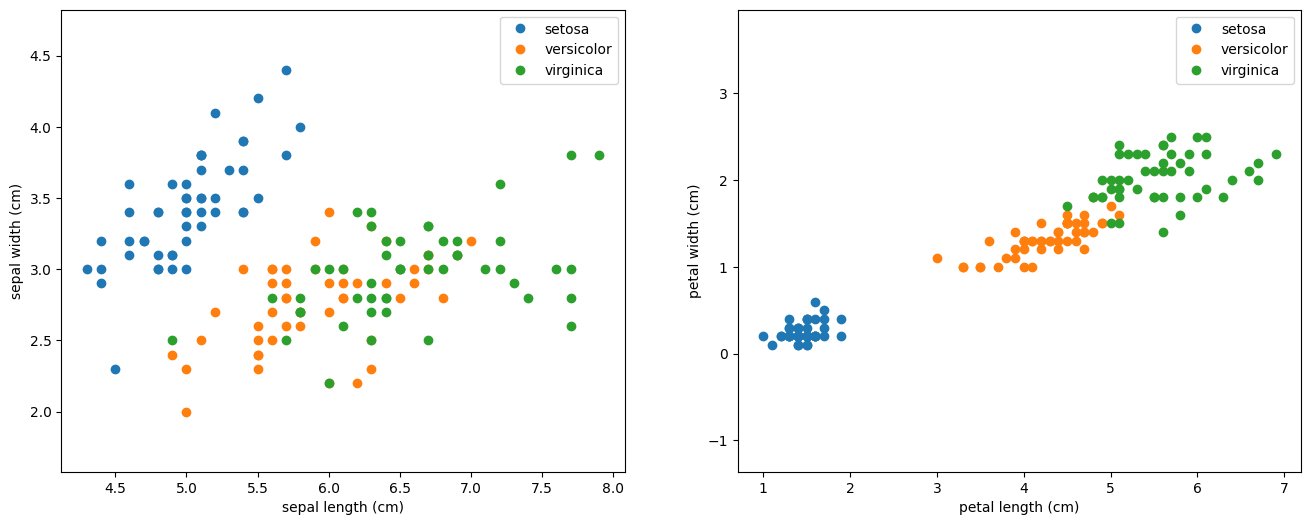

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1],
             linestyle='none',
             marker='o',
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend();

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3],
             linestyle='none',
             marker='o',
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend();


# Observing the dataset

Thus, we can observe the dataset and see that there are *3 classes, setosa, versicolor, and virginica*.

There are *4 features, sepal width, sepal length, petal width, petal length*.

# MLP for multiclass classification

In [ ]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
import tqdm

In [ ]:
# Defining the model architecture
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [ ]:
# Instantiating the model, using Adam optimiser, and Cross Entropy Loss, which is quite commonlu used for classification tasks.
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

# Train the model

In [ ]:
# Train for 100 epochs
EPOCHS  = 100
X_train = torch.from_numpy(X_train).float()
X_test= torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test)
y_train = torch.from_numpy(y_train)


loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 100/100 [00:00<00:00, 306.98it/s]


# Plot training progress

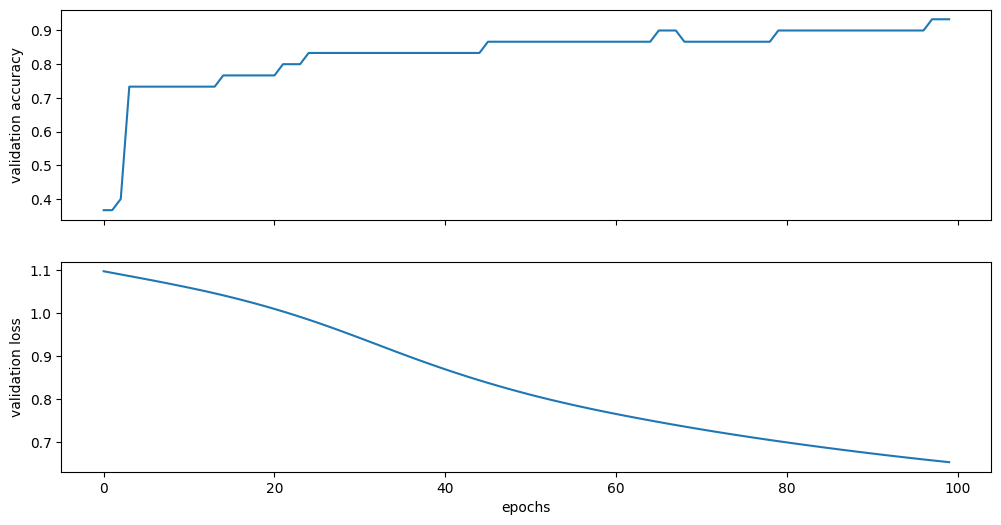

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

# Experiment with the neural network architecture


1.   Try changing the number of hidden layers.
2.   Try changing the number of neurons in the hidden layer.
3.   Try using a different activation function.




Can you observe any changes?

1st answer;
Adding more hidden layers to a neural network can increase its capacity to learn complex patterns from the data, potentially improving its performance on tasks. However, increasing the number of hidden layers also introduces challenges such as overfitting, where the model learns to memorize the training data rather than generalize well to unseen data.

Conversely, reducing the number of hidden layers might simplify the model, making it easier to train and less prone to overfitting, but it might also limit the model's ability to capture intricate patterns in the data.

The optimal number of hidden layers and neurons within those layers depends on various factors such as the complexity of the problem, the amount of available data, computational resources, and the desired balance between model complexity and generalization.

When experimenting with the number of hidden layers, it's essential to monitor the model's performance on both training and validation data to avoid overfitting and ensure that the model generalizes well to unseen data.



2nd answer:
Adjusting the number of neurons in the hidden layers is another way to modify the capacity and behavior of a neural network. Here's how it typically impacts the network:

Increasing Neurons: Adding more neurons in a hidden layer increases the capacity of the network to learn complex patterns from the data. This can potentially improve performance on tasks that require capturing intricate relationships within the data. However, it also increases the computational cost and may lead to overfitting if not regularized properly.
Decreasing Neurons: Reducing the number of neurons simplifies the model, making it less complex and potentially easier to train. This may help mitigate overfitting and improve generalization, especially in cases where the original model was too large for the available data. However, reducing neurons too much might result in underfitting, where the model fails to capture important patterns in the data.
Finding the optimal number of neurons in a hidden layer often involves experimentation and tuning. It depends on factors such as the complexity of the problem, the amount of available data, and computational resources. Techniques such as cross-validation and regularization can help in selecting an appropriate number of neurons to balance model complexity and generalization.



3rd answer;
Sigmoid: The sigmoid function squashes the input values to the range [0, 1]. It's commonly used in the output layer of binary classification tasks. However, it suffers from the vanishing gradient problem, making it less suitable for deep neural networks.
ReLU (Rectified Linear Unit): ReLU sets negative values to zero and leaves positive values unchanged. It has become one of the most popular activation functions due to its simplicity and effectiveness in combating the vanishing gradient problem. However, it can suffer from the "dying ReLU" problem, where neurons get stuck in a negative state and cease to learn.
Leaky ReLU: Leaky ReLU is similar to ReLU but allows a small, non-zero gradient for negative inputs. This helps mitigate the dying ReLU problem.
Tanh (Hyperbolic Tangent): Tanh squashes input values to the range [-1, 1]. It's similar to the sigmoid function but centered at zero, which can help with training stability. However, it still suffers from the vanishing gradient problem.
Softmax: Softmax is often used in the output layer of multi-class classification tasks. It converts raw scores into probabilities that sum up to 1, making it suitable for multi-class classification problems.
Experimenting with different activation functions can help improve the performance of a neural network by addressing issues such as vanishing gradients, training stability, and learning speed.

